In [1]:
import json
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [2]:
# Load evidence dataset
# Read evidence
with open('../data/evidence.json', 'r') as f:
    evidence = json.load(f)
eviden = pd.DataFrame.from_dict(evidence, orient='index', columns=['evidence'])

# Read dev claims
with open('../data/dev-claims.json', 'r') as f:
    df_dev = pd.DataFrame(json.load(f)).transpose()

# Load encoded evidence set
with open('../data/encoded_evidence.json', 'rb') as f:
    enc_ev = np.load(f)
# Load encoded dev set
with open('../data/encoded_dev_claims.json', 'rb') as f:
    enc_dv = np.load(f)

In [83]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
tot = enc_dv.shape[0]
dv_sim = []
dv_sim_ = []
df = pd.Series(np.array(eviden.index)).reset_index(name='id').drop(['index'], axis=1)
for i in range(tot):
    print(f'{i} of {tot} iterantions')
    similarity = cos(torch.from_numpy(enc_ev), torch.from_numpy(enc_dv[i]))
    df['similarity'] = similarity.detach().numpy().reshape(-1)
    dv_sim.append(min(df[df['id'].isin(df_dev.iloc[1]['evidences'])].similarity))
    dv_sim_.append(np.median(df[~df['id'].isin(df_dev.iloc[1]['evidences'])].similarity))

0 of 154 iterantions
1 of 154 iterantions
2 of 154 iterantions
3 of 154 iterantions
4 of 154 iterantions
5 of 154 iterantions
6 of 154 iterantions
7 of 154 iterantions
8 of 154 iterantions
9 of 154 iterantions
10 of 154 iterantions
11 of 154 iterantions
12 of 154 iterantions
13 of 154 iterantions
14 of 154 iterantions
15 of 154 iterantions
16 of 154 iterantions
17 of 154 iterantions
18 of 154 iterantions
19 of 154 iterantions
20 of 154 iterantions
21 of 154 iterantions
22 of 154 iterantions
23 of 154 iterantions
24 of 154 iterantions
25 of 154 iterantions
26 of 154 iterantions
27 of 154 iterantions
28 of 154 iterantions
29 of 154 iterantions
30 of 154 iterantions
31 of 154 iterantions
32 of 154 iterantions
33 of 154 iterantions
34 of 154 iterantions
35 of 154 iterantions
36 of 154 iterantions
37 of 154 iterantions
38 of 154 iterantions
39 of 154 iterantions
40 of 154 iterantions
41 of 154 iterantions
42 of 154 iterantions
43 of 154 iterantions
44 of 154 iterantions
45 of 154 iterantion

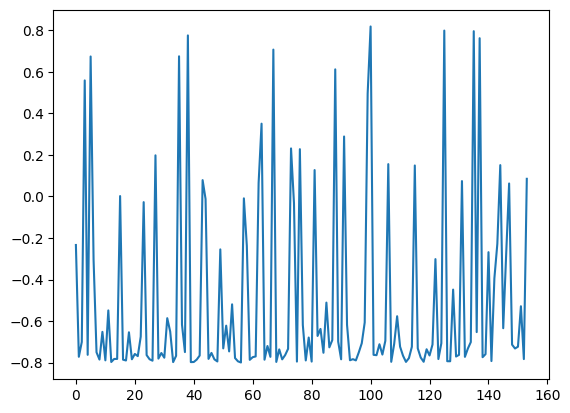

In [91]:
plt.plot(dv_sim_)

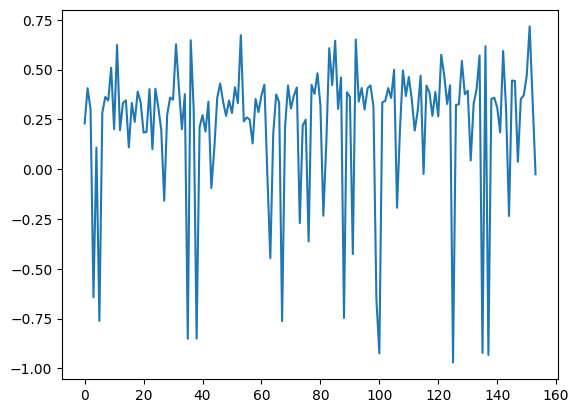

In [92]:
plt.plot(dv_sim)

In [61]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0, n_components=2)
comp = pca.fit_transform(df.set_index('id'))

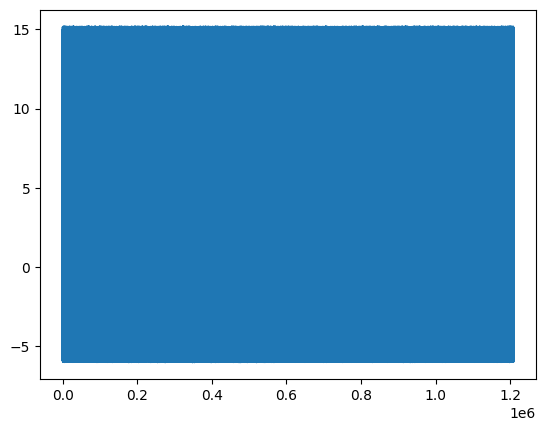

In [74]:
plt.plot(comp.T[0])

In [80]:
df_dev.loc['claim-752','evidences']

['evidence-67732', 'evidence-572512']

In [82]:
df.set_index('id').loc['evidence-572512','claim-752']

-0.2826327

In [70]:
df['label'] = 0
df.loc[df['id'].isin(df_dev.iloc[1]['evidences']),'label'] = 1
df['label'].value_counts()

/var/folders/5v/mt404vm51mvcpt_t2j5z7dbm0000gn/T/ipykernel_43556/1082115130.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['label'] = 0


label
0    1208822
1          5
Name: count, dtype: int64

In [49]:
df

,id,similarity,label
0,evidence-0,0.334623,0
1,evidence-1,0.168543,0
2,evidence-2,-0.226290,0
3,evidence-3,-0.733720,0
4,evidence-4,-0.186720,0
...,...,...,...
1208822,evidence-1208822,0.064386,0
1208823,evidence-1208823,0.001974,0
1208824,evidence-1208824,0.196920,0
1208825,evidence-1208825,0.652068,0


In [6]:
np.quantile(dv_sim, [.25, .5, .75, .9])

array([0.19717742, 0.33418655, 0.40529114, 0.49165784])

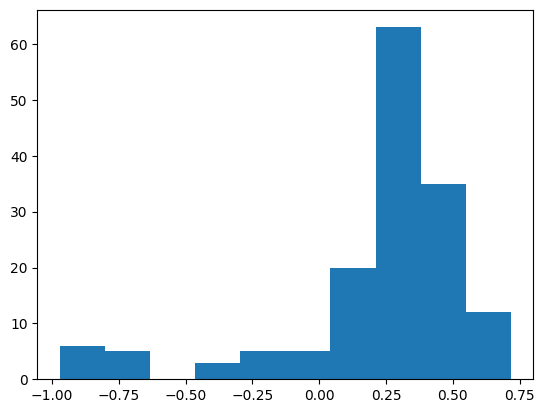

In [7]:
import matplotlib.pyplot as plt
plt.hist(dv_sim)
plt.show()

In [46]:
list(df[df['label'] == 0].index)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1208817, 1208818, 1208819, 1208820, 1208821, 1208822, 1208823, 1208824,
       1208825, 1208826],
      dtype='int64', length=1208822)

[]

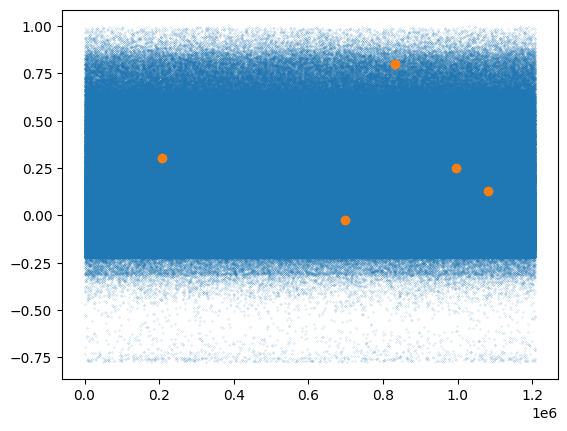

In [48]:
plt.scatter(df[df['label'] == 0].index, df[df['label'] == 0]['similarity'], s=0.01)
plt.scatter(df[df['label'] == 1].index, df[df['label'] == 1]['similarity'])
plt.plot()

In [150]:
pd.DataFrame(dv_sim, columns=['sim']).to_csv('../data/dv_similarity.csv')

In [4]:
dv_sim = pd.read_csv('../data/dv_similarity.csv')

In [5]:
import plotly.express as px
fig = px.box(pd.DataFrame(dv_sim, columns=['sim']), y="sim")
fig.show()

In [135]:
(58920+491)/32

1856.59375

In [143]:
(eviden.sample(frac=0.0001).shape[0]*491)/32

1856.59375